In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

In [2]:
train_data.shape,test_data.shape

((25000,), (25000,))

In [3]:
#Print max value of index words
max([max(sequence) for sequence in train_data])

9999

In [4]:
#Decoding an example of data (converting to original words)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[17]]) #Decode the sample number 17
print(decoded_review)

? at the height of the ? big ? racism row in 2007 involving ? ? and the late ? ? i condemned on an internet forum those ? b b ' fans who praised the show after years of bashing ? ? sitcoms such as ? ? ? ? ? i thought they were being ? and said so ? ain't half hot ? was then thrown into the argument with some pointing out it had starred an english actor ? up well yes but michael bates had lived in india as a boy and spoke ? ? the show's ? overlook the reality he brought to his performance as ? ? ? the noted indian character actor ? ? said in a 1995 documentary ? ? the ? that he was upset when he heard bates had landed the role but added no indian actor could have played that role as well as bates indeed br br ? was perry and ? companion show to ? ? also set in wartime the ? english town of ? on sea had been replaced by the hot steamy ? of india in particularly a place called ? where an army concert party puts on shows for the troops among them ? ? george ? his first sitcom role since ? 

In [5]:
#One hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
#Print an example of one hot encoded sample
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [7]:
#Vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train.shape,x_test.shape

((25000, 10000), (25000, 10000))

In [8]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers. Dense (16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense (16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.summary()

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train [10000:]

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30/30 [==============================] - 4s 75ms/step - loss: 0.5163 - accuracy: 0.7976 - val_loss: 0.3976 - val_accuracy: 0.8662
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3141 - accuracy: 0.9030 - val_loss: 0.3130 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============

In [9]:
#Consulting the history
history_dict = history.history
print( history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


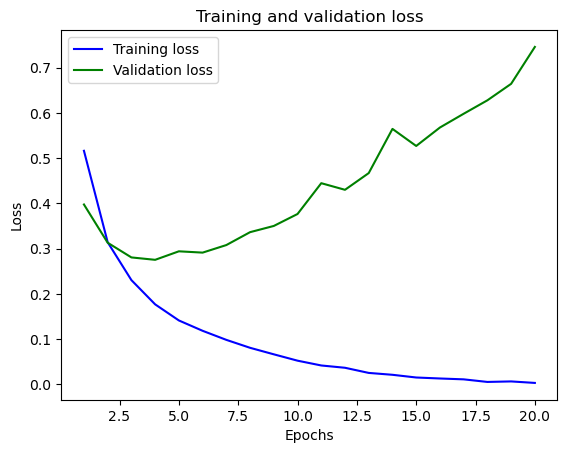

In [10]:
#Plotting the loss
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = np.array(history_dict['loss'])
val_loss_values = np.array(history_dict['val_loss'])

epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss',color='green')
plt.title('Training and validation loss')

#min_val_loss = np.min(val_loss_values)
#min_val_loss_epoch = np.where(val_loss_values == min_val_loss)+ np.array([1])

#plt.plot(min_val_loss_epoch,min_val_loss , 'bo', label=f'min_val_loss_epoch ={min_val_loss_epoch}',color='red')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

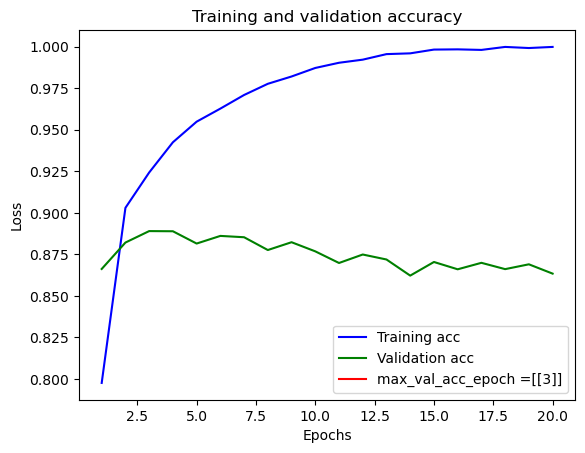

In [11]:
plt.clf()
acc_values = np.array(history_dict['accuracy'])
val_acc_values = np.array(history_dict['val_accuracy'])


plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, label='Validation acc',color='green')

max_val_acc = np.max(val_acc_values)
max_val_acc_epoch = np.where(val_acc_values == max_val_acc) + np.array([1])

plt.plot(max_val_acc_epoch,max_val_acc , label=f'max_val_acc_epoch ={max_val_acc_epoch}',color='red')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Dense (16, activation='relu', input_shape=(10000,)))
model.add(layers. Dense (16, activation='relu'))
model.add(layers. Dense (1, activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)


results = model.evaluate(x_test, y_test)
print(results)
model.predict(x_test)

Epoch 1/4
49/49 [==============================] - 2s 11ms/step - loss: 0.4482 - accuracy: 0.8191
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2557 - accuracy: 0.9124
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1998 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 9s 10ms/step - loss: 0.2926 - accuracy: 0.8858
[0.2926238775253296, 0.8858399987220764]
782/782 [==============================] - 7s 8ms/step


array([[0.17692618],
       [0.99994   ],
       [0.75149417],
       ...,
       [0.15028688],
       [0.08465059],
       [0.5205604 ]], dtype=float32)